In [80]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Data Processing

In [81]:
# import the dataset
# Making a list of missing value types
missing_values = ["?", ""] # After check the csv files, we can find the missing values are ?.
df = pd.read_csv('breast-cancer-wisconsin.csv', na_values = missing_values) 
print(df.shape)
df.head(10)

(699, 11)


,Sample,F1,F2,F3,F4,F5,F6,F7,F8,F9,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
5,1017122,8,10,10,8,7,10.0,9,7,1,4
6,1018099,1,1,1,1,2,10.0,3,1,1,2
7,1018561,2,1,2,1,2,1.0,3,1,1,2
8,1033078,2,1,1,1,2,1.0,1,1,5,2
9,1033078,4,2,1,1,2,1.0,2,1,1,2


In [82]:
# To find the total number of null values
df.isnull().sum()

Sample     0
F1         0
F2         0
F3         0
F4         0
F5         0
F6        16
F7         0
F8         0
F9         0
Class      0
dtype: int64

In [83]:
df.dropna(inplace = True)
df.head(10)

,Sample,F1,F2,F3,F4,F5,F6,F7,F8,F9,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
5,1017122,8,10,10,8,7,10.0,9,7,1,4
6,1018099,1,1,1,1,2,10.0,3,1,1,2
7,1018561,2,1,2,1,2,1.0,3,1,1,2
8,1033078,2,1,1,1,2,1.0,1,1,5,2
9,1033078,4,2,1,1,2,1.0,2,1,1,2


In [84]:
# Replace factors' name
df.rename(columns={"F1" : "Clump Thickness", "F2" : "Uniformity of Cell Size", "F3" : "Uniformity of Cell Shape",
                     "F4" : "Marginal Adhesion", "F5" : "Single Epithelial Cell Size", "F6" : "Bare Nuclei", 
                     "F7" : "Bland Chromatin", "F8" : "Normal Nucleoli", "F9" : "Mitoses", "Class" : "Diagnosis Class"},inplace=True)
df.head()

,Sample,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Diagnosis Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [85]:
df.columns

Index(['Sample', 'Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Diagnosis Class'],
      dtype='object')

In [86]:
from sklearn.model_selection import train_test_split
x=df[[ 'Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses']]
y=df[['Diagnosis Class']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)    # Use 30% test 70% training data. 

# Decision Tree Classifier with criterion gini index

In [87]:
# import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=1)

# Fit dt to the training set
dt.fit(x_train, y_train)

# Predict test set labels
y_pred = dt.predict(x_test)
print(y_pred[0:5])

[2 2 2 4 2]


# Evaluate the classification tree with criterion gini index

In [88]:
# Import accuracy_score
from sklearn.metrics import accuracy_score

# Compute test set accuracy  
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.4f}".format(acc))

Test set accuracy: 0.9659


[Text(361.8, 403.81714285714287, 'X[1] <= 3.5\ngini = 0.455\nsamples = 478\nvalue = [311, 167]'),
 Text(172.8, 341.69142857142856, 'X[5] <= 3.5\ngini = 0.14\nsamples = 329\nvalue = [304, 25]'),
 Text(86.4, 279.5657142857143, 'X[7] <= 3.5\ngini = 0.033\nsamples = 298\nvalue = [293, 5]'),
 Text(43.2, 217.44, 'X[8] <= 2.5\ngini = 0.007\nsamples = 291\nvalue = [290, 1]'),
 Text(21.6, 155.3142857142857, 'gini = 0.0\nsamples = 287\nvalue = [287, 0]'),
 Text(64.80000000000001, 155.3142857142857, 'X[0] <= 4.0\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(43.2, 93.18857142857144, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(86.4, 93.18857142857144, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(129.60000000000002, 217.44, 'X[0] <= 4.5\ngini = 0.49\nsamples = 7\nvalue = [3, 4]'),
 Text(108.0, 155.3142857142857, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(151.20000000000002, 155.3142857142857, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(259.20000000000005, 279.5657142857

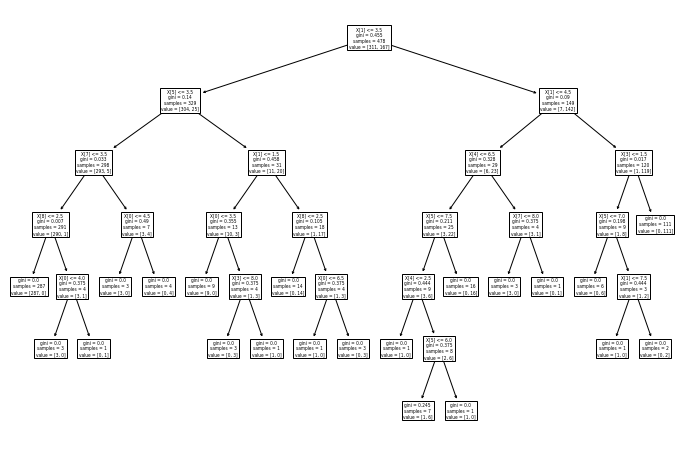

In [89]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(dt.fit(x_train, y_train)) 